In [1]:
! pip install sweetviz

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
#import sweetviz as sv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv('churn_data.csv')

In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
#df = df.drop(['CustomerID', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason'], axis=1)
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [8]:
# Generate Sweetviz report

#result = sv.analyze(df, "Churn Value", pairwise_analysis="on")
#result.show_html()

In [9]:

# converts total charges from string to float
df['Total Charges'] = df['Total Charges'].replace(r'^\s*$', np.nan, regex=True)
df['Total Charges'] = df['Total Charges'].astype(float)
#choosing variables apart from irrelevant columns
df1 = df[['Country', 'State', 'City', 'Latitude', 'Longitude', 'Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV','Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method','Monthly Charges', 'Total Charges', 'CLTV','Churn Value']]
df1.head()


,Country,State,City,Latitude,Longitude,Zip Code,Gender,Senior Citizen,Partner,Dependents,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value
0,United States,California,Los Angeles,33.964131,-118.272783,90003,Male,No,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3239,1
1,United States,California,Los Angeles,34.059281,-118.307420,90005,Female,No,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2701,1
2,United States,California,Los Angeles,34.048013,-118.293953,90006,Female,No,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,5372,1
3,United States,California,Los Angeles,34.062125,-118.315709,90010,Female,No,Yes,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,5003,1
4,United States,California,Los Angeles,34.039224,-118.266293,90015,Male,No,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,5340,1


In [10]:
#one hot encodeing all variables
df_encoded = pd.get_dummies(df1, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents','Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV','Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'])

In [11]:
# Dropping dummy variables
#df_encoded = df_encoded.drop(['Gender_Female', 'Senior Citizen_No', 'Partner_No', 'Paperless Billing_No', 'Dependents_No', 'Phone Service_No', 'Multiple Lines_No', 'Internet Service_No', 'Online Security_No', 'Online Backup_No', 'Device Protection_No', 'Tech Support_No', 'Streaming TV_No', 'Streaming Movies_No', 'Contract_One year', 'Payment Method_Mailed check'], axis = 1)
df_encoded = df_encoded.drop(['Multiple Lines_No phone service', 'Online Security_No internet service', 'Online Backup_No internet service','Device Protection_No internet service', 'Tech Support_No internet service', 'Streaming TV_No internet service', 'Streaming Movies_No internet service', 'Gender_Female', 'Senior Citizen_No', 'Partner_No', 'Paperless Billing_No', 'Dependents_No', 'Phone Service_No', 'Multiple Lines_No', 'Internet Service_No', 'Online Security_No', 'Online Backup_No', 'Device Protection_No', 'Tech Support_No', 'Streaming TV_No', 'Streaming Movies_No', 'Contract_One year', 'Payment Method_Mailed check'], axis = 1)
# Scaling continuous variable
scaler = StandardScaler()
df_encoded[['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']] = scaler.fit_transform(df_encoded[['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']])
df_encoded.head()

,Country,State,City,Latitude,Longitude,Zip Code,Tenure Months,Monthly Charges,Total Charges,CLTV,...,Device Protection_Yes,Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Contract_Month-to-month,Contract_Two year,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check
0,United States,California,Los Angeles,33.964131,-118.272783,90003,-1.236724,-0.362660,-0.959649,-0.981675,...,0,0,0,0,1,0,1,0,0,0
1,United States,California,Los Angeles,34.059281,-118.307420,90005,-1.236724,0.197365,-0.940457,-1.436462,...,0,0,0,0,1,0,1,0,0,1
2,United States,California,Los Angeles,34.048013,-118.293953,90006,-0.992402,1.159546,-0.645369,0.821409,...,1,0,1,1,1,0,1,0,0,1
3,United States,California,Los Angeles,34.062125,-118.315709,90010,-0.177995,1.330711,0.336516,0.509483,...,1,1,1,1,1,0,1,0,0,1
4,United States,California,Los Angeles,34.039224,-118.266293,90015,0.677133,1.294151,1.214589,0.794358,...,1,0,1,1,1,0,1,1,0,0


In [12]:
df_la = df_encoded[df_encoded['Zip Code'] == 90012]
df_la.columns

Index(['Country', 'State', 'City', 'Latitude', 'Longitude', 'Zip Code',
       'Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV',
       'Churn Value', 'Gender_Male', 'Senior Citizen_Yes', 'Partner_Yes',
       'Dependents_Yes', 'Phone Service_Yes', 'Multiple Lines_Yes',
       'Internet Service_DSL', 'Internet Service_Fiber optic',
       'Online Security_Yes', 'Online Backup_Yes', 'Device Protection_Yes',
       'Tech Support_Yes', 'Streaming TV_Yes', 'Streaming Movies_Yes',
       'Contract_Month-to-month', 'Contract_Two year', 'Paperless Billing_Yes',
       'Payment Method_Bank transfer (automatic)',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check'],
      dtype='object')

In [13]:
# Dealing with Latitude and Longitude variables by finding manhatten distance
from math import radians
import math

# Define the central location
central_lat = radians(34.065875)
central_lon = radians(-118.238728)

# Define a function to calculate the Manhattan distance
def manhattan_distance(lat1, lon1, lat2, lon2):
    """Calculate the Manhattan distance between two points."""
    dx = abs(lon2 - lon1) * 6371 * math.cos((lat1 + lat2) / 2)
    dy = abs(lat2 - lat1) * 6371
    return dx + dy

# Apply the function to each row in the DataFrame
df_encoded['manhattan_distance'] = df_encoded.apply(lambda x: manhattan_distance(radians(x['Latitude']), radians(x['Longitude']), central_lat, central_lon), axis=1)

# View the updated DataFrame
df_encoded.head()

,Country,State,City,Latitude,Longitude,Zip Code,Tenure Months,Monthly Charges,Total Charges,CLTV,...,Tech Support_Yes,Streaming TV_Yes,Streaming Movies_Yes,Contract_Month-to-month,Contract_Two year,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,manhattan_distance
0,United States,California,Los Angeles,33.964131,-118.272783,90003,-1.236724,-0.362660,-0.959649,-0.981675,...,0,0,0,1,0,1,0,0,0,14.452214
1,United States,California,Los Angeles,34.059281,-118.307420,90005,-1.236724,0.197365,-0.940457,-1.436462,...,0,0,0,1,0,1,0,0,1,7.060907
2,United States,California,Los Angeles,34.048013,-118.293953,90006,-0.992402,1.159546,-0.645369,0.821409,...,0,1,1,1,0,1,0,0,1,7.073653
3,United States,California,Los Angeles,34.062125,-118.315709,90010,-0.177995,1.330711,0.336516,0.509483,...,1,1,1,1,0,1,0,0,1,7.508106
4,United States,California,Los Angeles,34.039224,-118.266293,90015,0.677133,1.294151,1.214589,0.794358,...,0,1,1,1,0,1,1,0,0,5.502956


In [14]:
df_encoded[['manhattan_distance']] = scaler.fit_transform(df_encoded[['manhattan_distance']])
df_features = df_encoded.drop(['Latitude', 'Longitude', 'Zip Code', 'Country', 'State', 'City'], axis=1)
df_features = df_features.dropna()

# Exploratory Data Analysis

In [ ]:
## Correlation Plots

<Axes: >

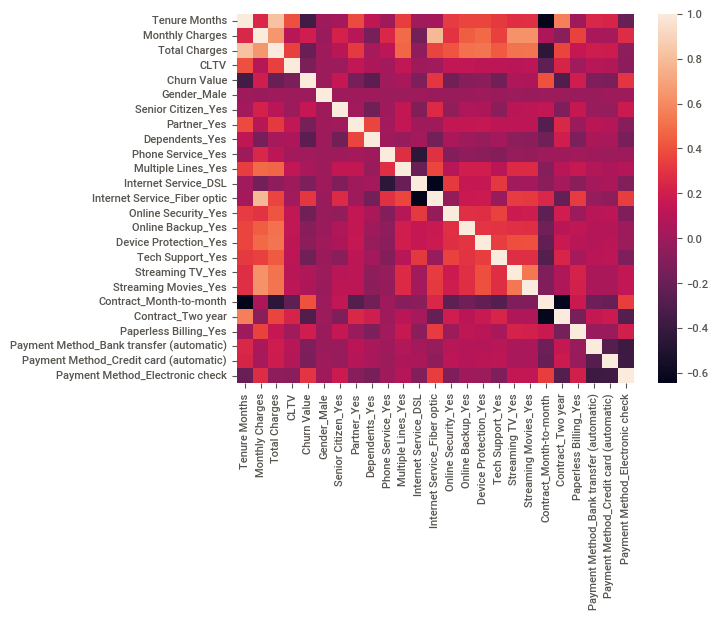

In [ ]:
plt.figure()
sns.heatmap(df_encoded.corr())

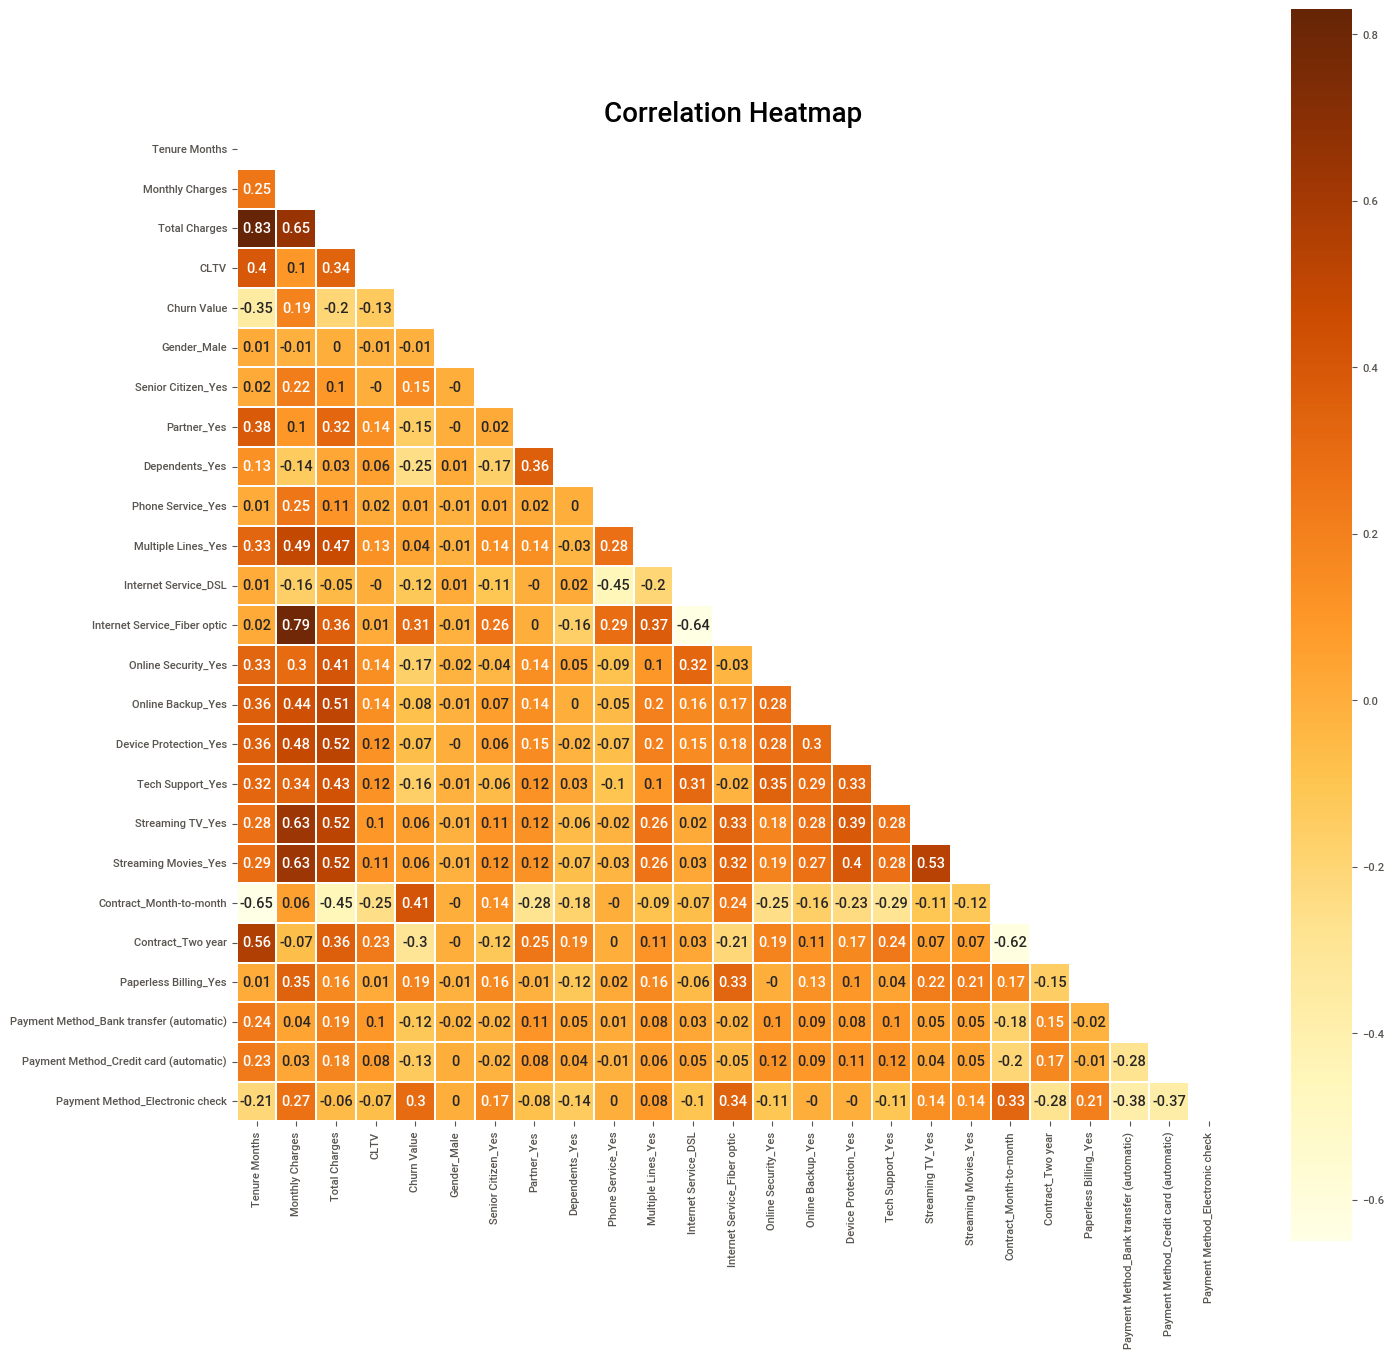

In [ ]:
# Generate correlation matrix
var_corr = round(df_encoded.corr(),2)

# Set mask for upper triangle
mask = np.zeros_like(var_corr)
mask[np.triu_indices_from(mask)] = True

# Set figure size and create heatmap
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(var_corr,
            mask=mask,
            square=True,
            annot=True,
            annot_kws={'size': 10.5, 'weight': 'bold'},
            cmap=plt.get_cmap("YlOrBr"),
            linewidths=.1)

# Set chart title and show the plot
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

<Axes: >

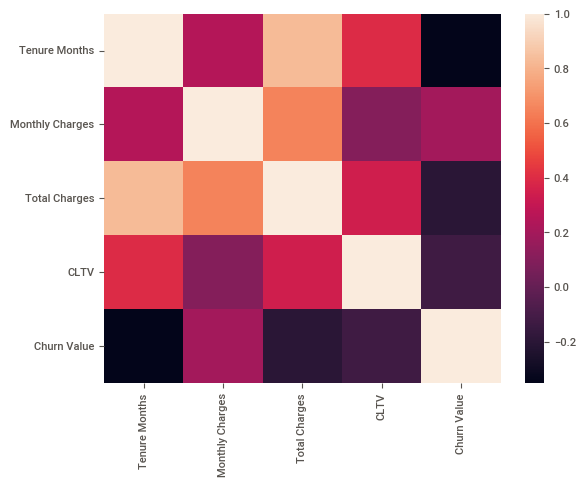

In [ ]:
df_nodummies = df1[['Tenure Months', 'Monthly Charges','Total Charges', 'CLTV', 'Churn Value']]
df_nodummies
plt.figure()
sns.heatmap(df_nodummies.corr())

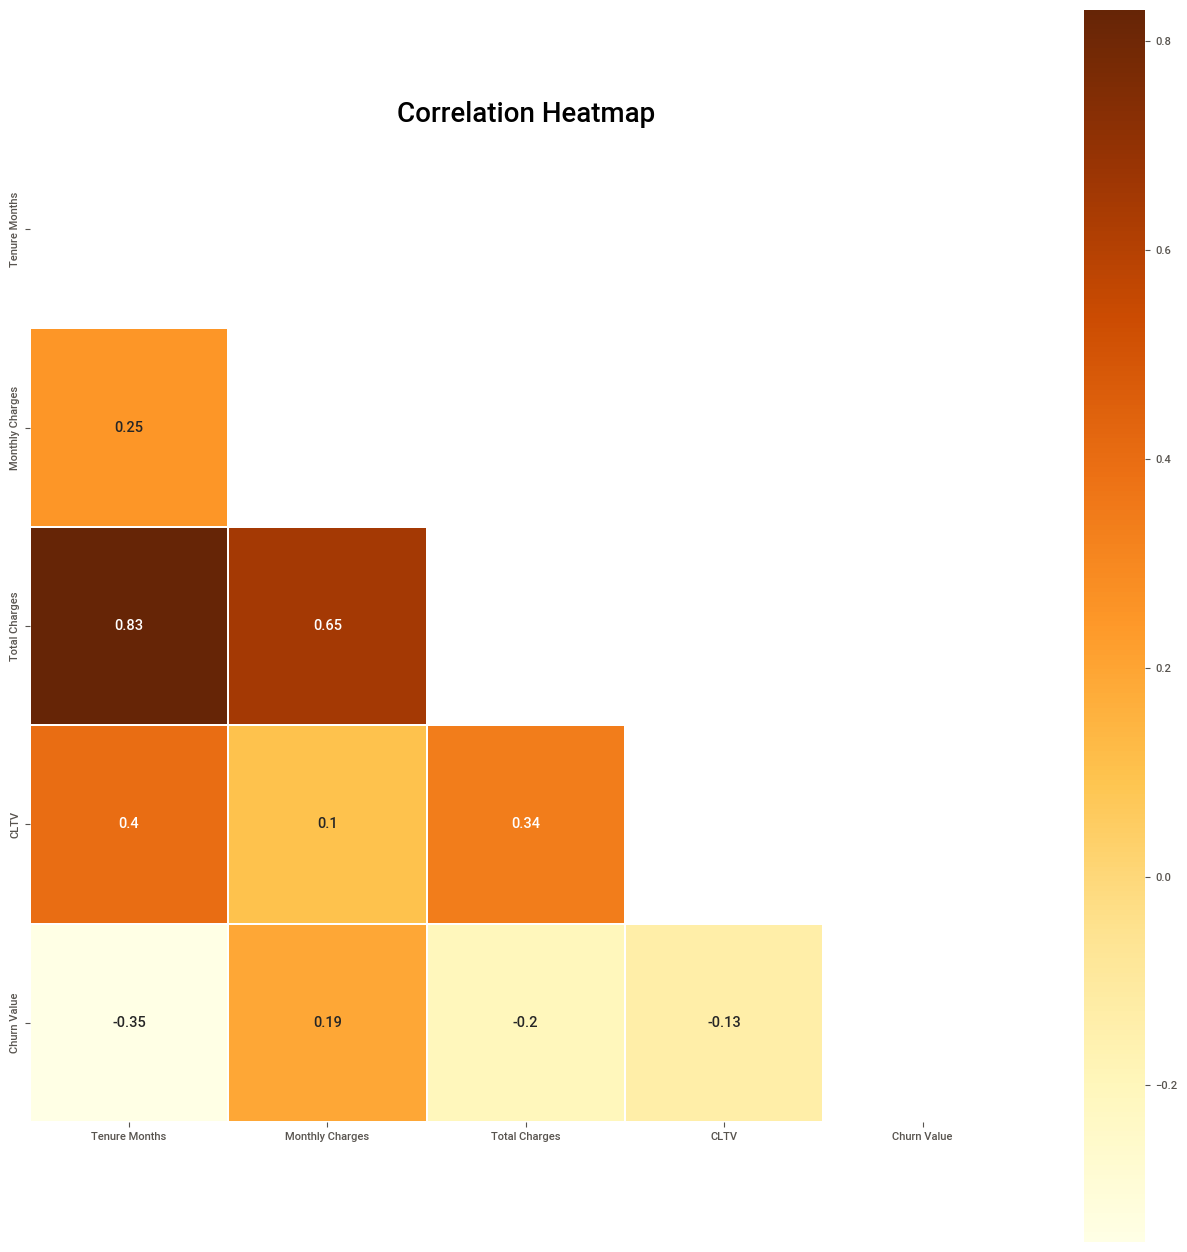

In [ ]:
# Generate correlation matrix
var_corr = round(df_nodummies.corr(),2)

# Set mask for upper triangle
mask = np.zeros_like(var_corr)
mask[np.triu_indices_from(mask)] = True

# Set figure size and create heatmap
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(var_corr,
            mask=mask,
            square=True,
            annot=True,
            annot_kws={'size': 10.5, 'weight': 'bold'},
            cmap=plt.get_cmap("YlOrBr"),
            linewidths=.1)

# Set chart title and show the plot
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

#It is noticeable that the correlation plot and heatmap do not seem to be in agreement. While both show CLTV has relatively good correlation with Churn Value, the correlation plot shows Tenure Month as having an extremely strong correlation with Churn value and  Total charges being moderately correlated with Churn Value. The opposite is true for the heatmap.  

## Scatter plots to check the potential value continous variables have

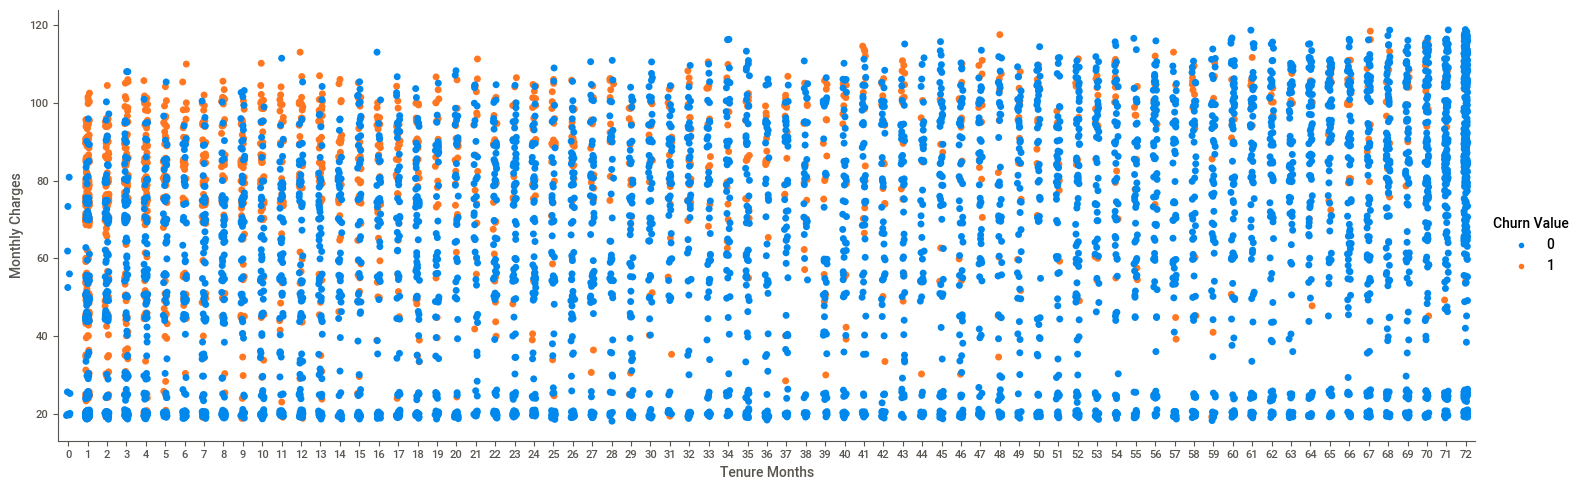

In [ ]:
sns.catplot(x='Tenure Months',
            y='Monthly Charges',
            hue='Churn Value', 
            data=df_nodummies,
            aspect =3)

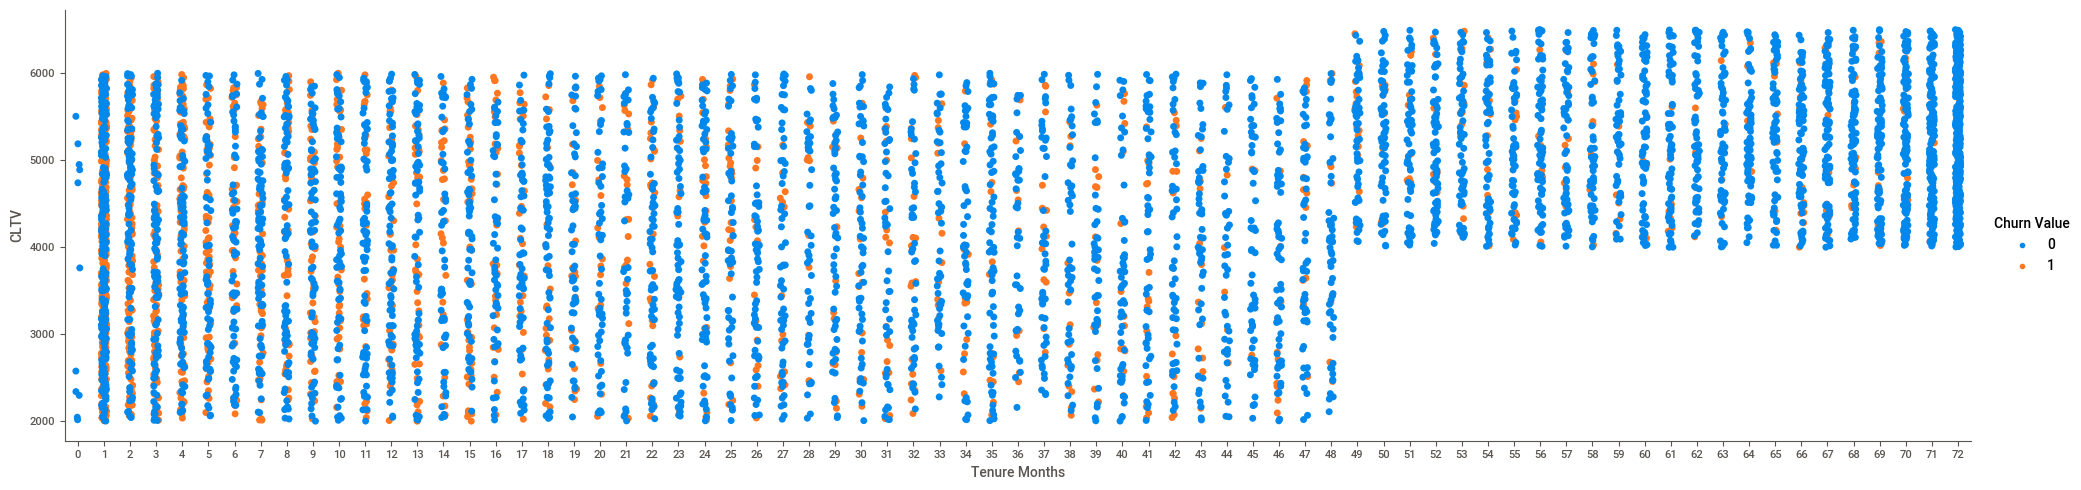

In [ ]:
sns.catplot(x='Tenure Months',
            y='CLTV',
            hue='Churn Value', 
            data=df_nodummies,
            aspect = 4)

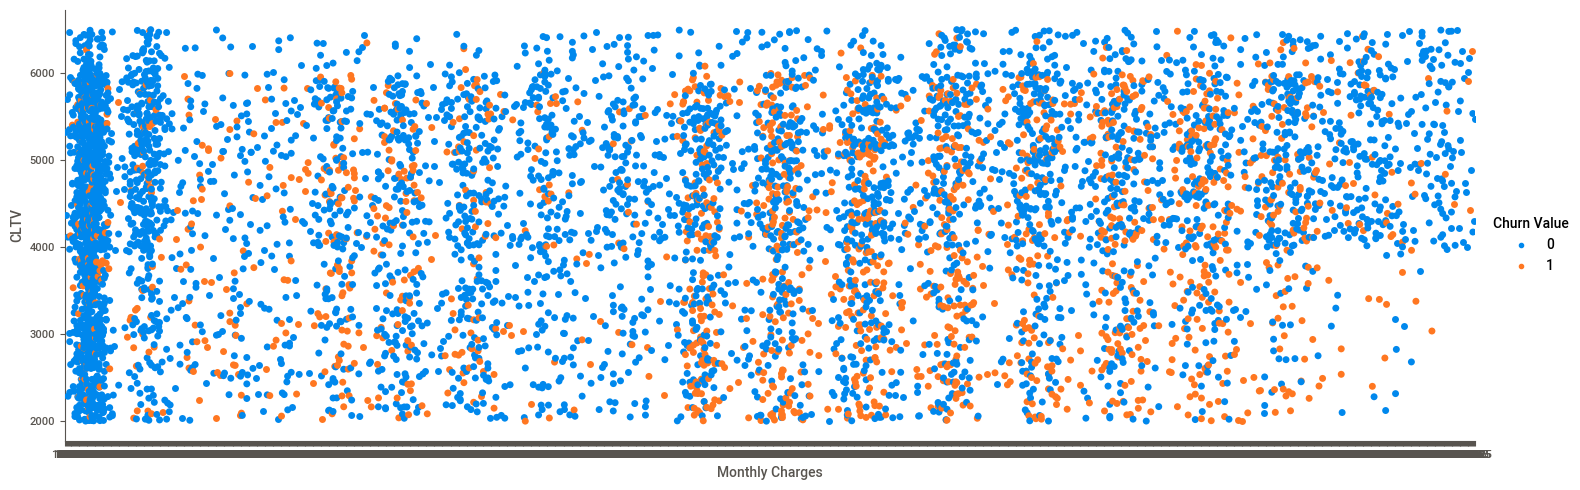

In [ ]:
sns.catplot(x='Monthly Charges',
            y='CLTV',
            hue='Churn Value', 
            data=df_nodummies,
            aspect =3)

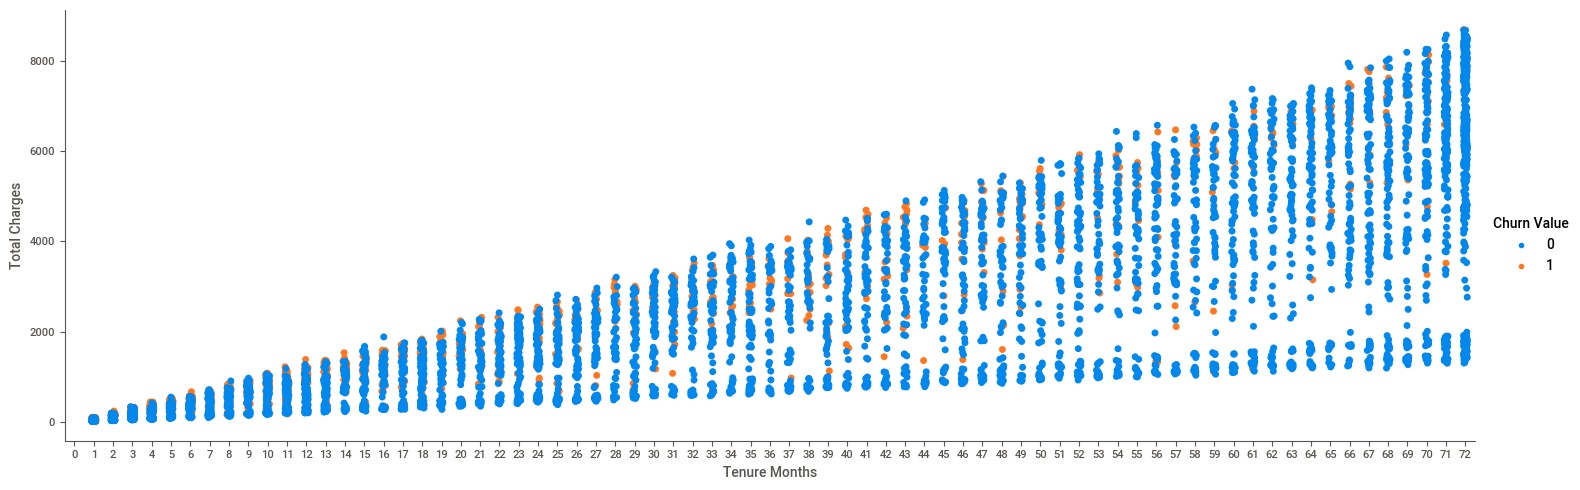

In [ ]:
sns.catplot(x='Tenure Months',
            y='Total Charges',
            hue='Churn Value', 
            data=df_nodummies,
            aspect =3)

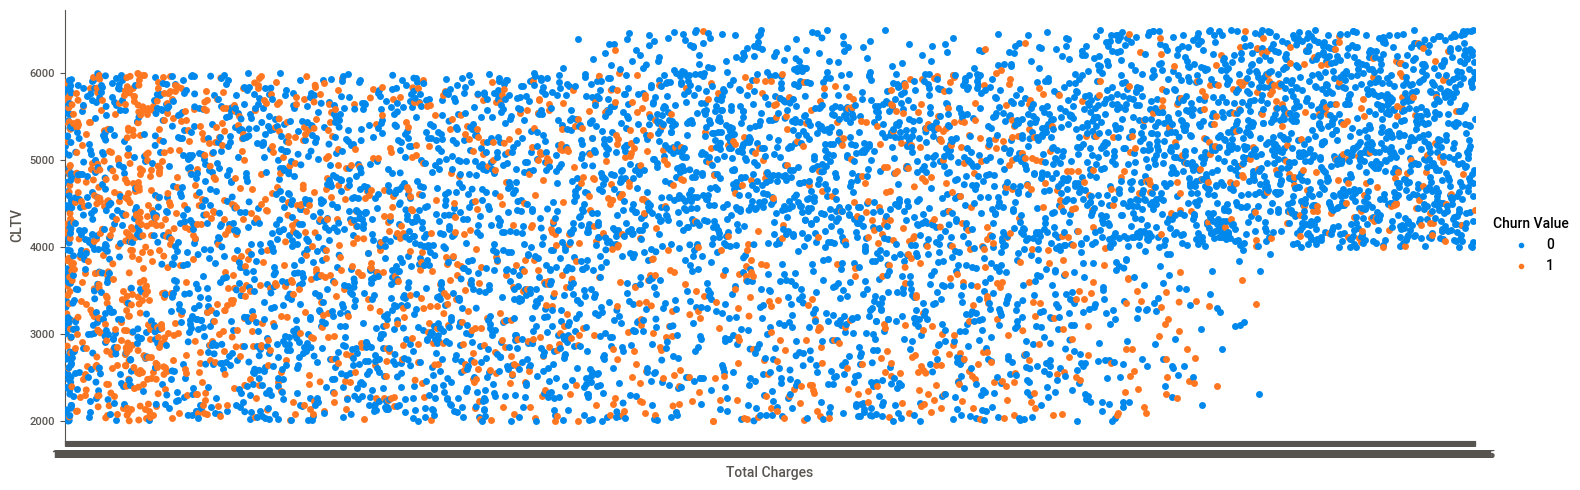

In [ ]:
sns.catplot(x='Total Charges',
            y='CLTV',
            hue='Churn Value', 
            data=df_nodummies,
            aspect =3)

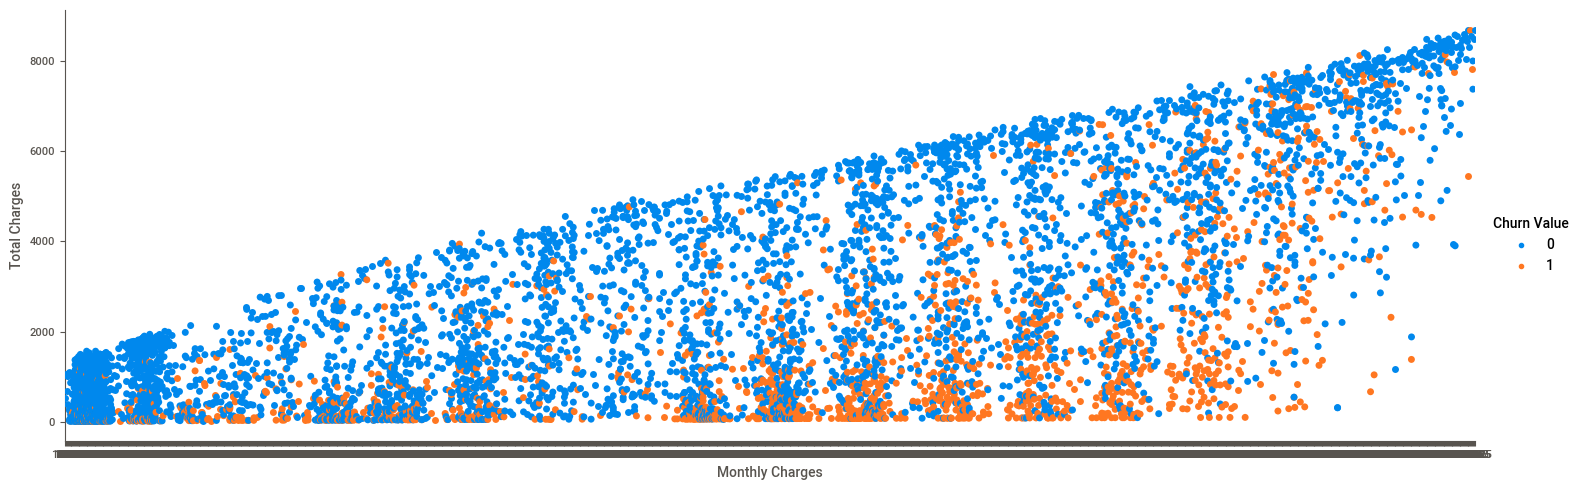

In [ ]:
sns.catplot(x='Monthly Charges',
            y='Total Charges',
            hue='Churn Value', 
            data=df_nodummies,
            aspect =3)

#From these scatter plots, we can see that amongst the continous variables CLTV and Total Charges seem to show the greatest seperation between Churn Value values and hence may be good predcitors. 